In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np

In [16]:
dtypes = {'ip': 'uint', 'app': 'uint', 
          'device': 'uint', 'os': 'uint', 
          'channel': 'category', 'is_attributed': 'uint'
         }

# import random

# n = 200000000 #number of records in file
# s = 1000000 #desired sample size
# filename = "data.txt"
# skip = sorted(random.sample(range(n),n-s))

path = 'C:/Users/johannes/Documents/kaggle/TalkingData/mnt/ssd/kaggle-talkingdata2/competition_files/'
# df = pd.read_csv(path + 'train_sample.csv')
df = pd.read_csv(path + 'train.csv', dtype=dtypes, nrows = 1000000)
# print(df.head())
# print(df.describe())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
ip                 1000000 non-null uint32
app                1000000 non-null uint32
device             1000000 non-null uint32
os                 1000000 non-null uint32
channel            1000000 non-null category
click_time         1000000 non-null object
attributed_time    1693 non-null object
is_attributed      1000000 non-null uint32
dtypes: category(1), object(2), uint32(5)
memory usage: 36.2+ MB


In [18]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [19]:
df.describe()

,ip,app,device,os,is_attributed
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,86993.581653,12.316655,26.141368,23.067662,0.001693
std,55529.023541,16.216890,273.537010,55.323313,0.041111
min,9.000000,0.000000,0.000000,0.000000,0.000000
25%,42297.000000,3.000000,1.000000,13.000000,0.000000
50%,81725.000000,12.000000,1.000000,18.000000,0.000000
75%,120440.000000,15.000000,1.000000,19.000000,0.000000
max,212773.000000,645.000000,3379.000000,715.000000,1.000000


In [20]:
df.click_time = pd.to_datetime(df.click_time)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
ip                 1000000 non-null uint32
app                1000000 non-null uint32
device             1000000 non-null uint32
os                 1000000 non-null uint32
channel            1000000 non-null category
click_time         1000000 non-null datetime64[ns]
attributed_time    1693 non-null object
is_attributed      1000000 non-null uint32
dtypes: category(1), datetime64[ns](1), object(1), uint32(5)
memory usage: 36.2+ MB


In [22]:
df.apply(lambda x: x.nunique())

ip                 39611
app                  214
device               298
os                   160
channel              154
click_time          1731
attributed_time     1530
is_attributed          2
dtype: int64

In [23]:
df.groupby('ip').size().describe()

count    39611.000000
mean        25.245513
std         84.288111
min          1.000000
25%          3.000000
50%         10.000000
75%         25.000000
max       6437.000000
dtype: float64

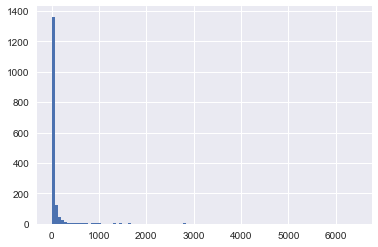

In [25]:
%matplotlib inline
buyers = df[~df.attributed_time.isnull()]
buyers = df[df.ip.isin(buyers.ip)]

buyers.groupby('ip').size().hist(bins = 100)

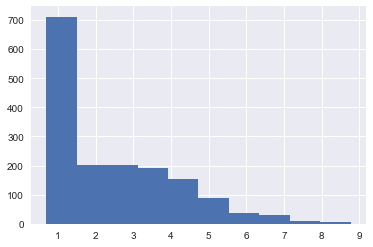

In [63]:
# log og clicks for buyers
np.log1p(buyers.groupby('ip').size()).hist()

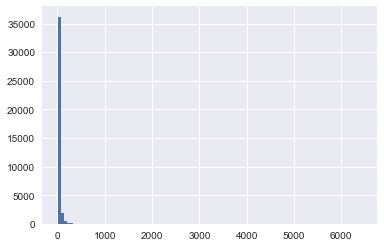

In [26]:
non_buyers = df[df.attributed_time.isnull()]
non_buyers = df[df.ip.isin(non_buyers.ip)]

non_buyers.groupby('ip').size().hist(bins = 100)

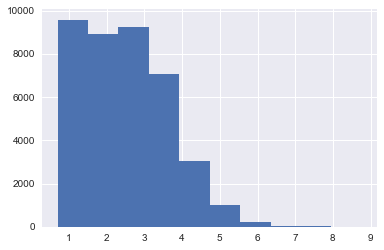

In [64]:
# log of CLicks for non-buyers
np.log1p(non_buyers.groupby('ip').size()).hist()

In [62]:
df['click_time_difference'] = df.groupby('ip').click_time.diff()

In [67]:
df.dtypes

ip                                uint32
app                               uint32
device                            uint32
os                                uint32
channel                         category
click_time                datetime64[ns]
attributed_time           datetime64[ns]
is_attributed                     uint32
click_time_difference    timedelta64[ns]
dtype: object

In [71]:
df['click_time_difference'] = df['click_time_difference'].map(lambda x: x/np.timedelta64(1, 's'))

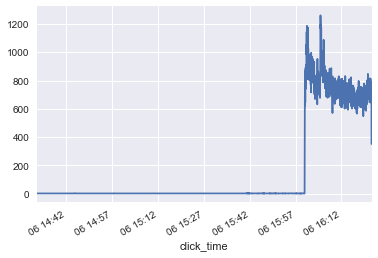

In [28]:
df.groupby('click_time').size().plot()

In [29]:
df.is_attributed.sum()

1693

In [30]:
(df.click_time.max() - df.click_time.min()) / np.timedelta64(1, 's')

6570.0

In [31]:
df['attributed_time'] = pd.to_datetime(df.attributed_time)

In [59]:
(df.attributed_time.max() - df.attributed_time.min()) / np.timedelta64(1,'s')

86084.0

In [33]:
%matplotlib inline
buyers.groupby(['ip']).size().shape

(1632,)

In [34]:
df.ip.unique().shape

(39611,)

In [35]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_time_difference
0,83230,3,1,13,379,2017-11-06 14:32:21,NaT,0,NaT
1,17357,3,1,19,379,2017-11-06 14:33:34,NaT,0,NaT
2,35810,3,1,13,379,2017-11-06 14:34:12,NaT,0,NaT
3,45745,14,1,13,478,2017-11-06 14:34:52,NaT,0,NaT
4,161007,3,1,13,379,2017-11-06 14:35:08,NaT,0,NaT


In [36]:
buyers.groupby('ip').is_attributed

In [58]:
buyers.sort_values(['ip','click_time']).head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
613323,39,19,0,24,213,2017-11-06 16:12:35,2017-11-07 05:26:43,1
669198,39,21,1,13,128,2017-11-06 16:13:54,NaN,0
691639,39,14,1,13,123,2017-11-06 16:14:26,NaN,0
786301,39,2,1,13,243,2017-11-06 16:16:43,NaN,0
786302,39,9,1,13,232,2017-11-06 16:16:43,NaN,0


In [87]:
df.dtypes

ip                               uint32
app                              uint32
device                           uint32
os                               uint32
channel                        category
click_time               datetime64[ns]
attributed_time          datetime64[ns]
is_attributed                    uint32
click_time_difference           float64
dtype: object

In [79]:
# pd.DataFrame(, columns = ['clicks','shopped'])
clicks_X_target = pd.concat((df.groupby('ip').size(), df.groupby('ip').is_attributed.max()), axis =1)
clicks_X_target.columns = ['clicks','is_attributed']
clicks_X_target['log_clicks'] = np.log1p(clicks_X_target.clicks)
clicks_X_target['click_time_difference_mean'] = df.groupby('ip').click_time_difference.mean().fillna(0)
clicks_X_target['click_time_difference_std'] = df.groupby('ip').click_time_difference.std().fillna(0)
clicks_X_target['click_time_difference_median'] = df.groupby('ip').click_time_difference.median().fillna(0)
clicks_X_target['click_time_difference_total'] = df.groupby('ip').click_time_difference.sum().fillna(0)
clicks_X_target['log_click_time_difference_mean'] = np.log1p(df.groupby('ip').click_time_difference.mean().fillna(0))
clicks_X_target['log_click_time_difference_std'] = np.log1p(df.groupby('ip').click_time_difference.std().fillna(0))
clicks_X_target['log_click_time_difference_median'] = np.log1p(df.groupby('ip').click_time_difference.median().fillna(0))
clicks_X_target['log_click_time_difference_total'] = np.log1p(df.groupby('ip').click_time_difference.sum().fillna(0))

In [92]:
df.groupby('ip').attributed_time.apply(lambda x: x if not x.isnull().all() else 0)

ip
9                                                         0
10                                                        0
20                                                        0
25                                                        0
27                                                        0
31                                                        0
36                                                        0
39        613323   2017-11-07 05:26:43
669198           ...
45                                                        0
52                                                        0
59                                                        0
60                                                        0
61                                                        0
63                                                        0
81                                                        0
83                                                        0
85                                   

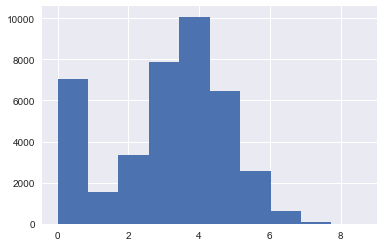

In [80]:
clicks_X_target.log_click_time_difference_mean.hist()

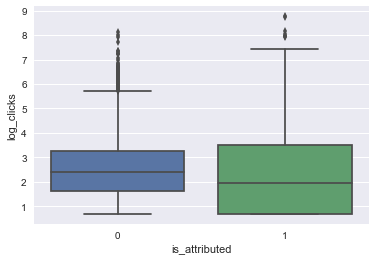

In [54]:
sns.boxplot(x="is_attributed", y="log_clicks", data=clicks_X_target)

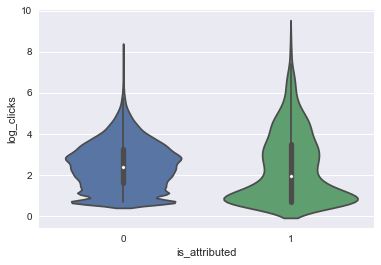

In [55]:
sns.violinplot(x="is_attributed", y="log_clicks", data=clicks_X_target)

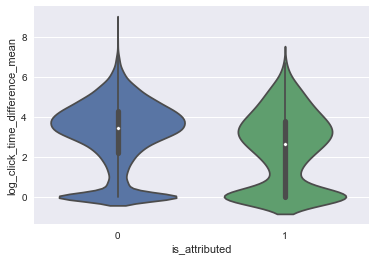

In [81]:
sns.violinplot(x="is_attributed", y="log_click_time_difference_mean", data=clicks_X_target)

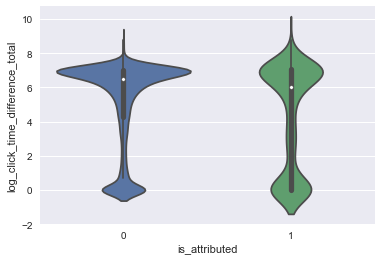

In [83]:
sns.violinplot(x="is_attributed", y="log_click_time_difference_total", data=clicks_X_target)

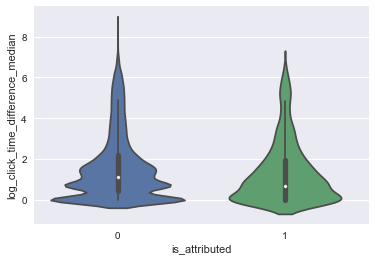

In [84]:
sns.violinplot(x="is_attributed", y="log_click_time_difference_median", data=clicks_X_target)

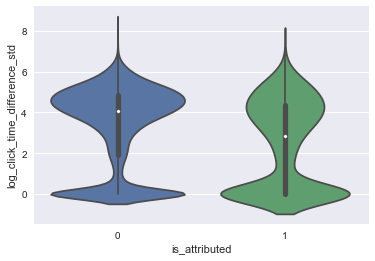

In [85]:
sns.violinplot(x="is_attributed", y="log_click_time_difference_std", data=clicks_X_target)

In [ ]:
df.isnull().sum() / df.shape[0]

In [ ]:
df.is_attributed.value_counts()

In [ ]:
from collections import Counter
df.is_attributed.value_counts().plot(kind = 'bar')

In [ ]:
df[['app', 'device', 'os', 'channel', 'is_attributed']].hist(figsize=(13,13))
plt.show()

In [ ]:
sns.pairplot(df[['app', 'device', 'os', 'channel', 'is_attributed']], hue="is_attributed")
plt.show()

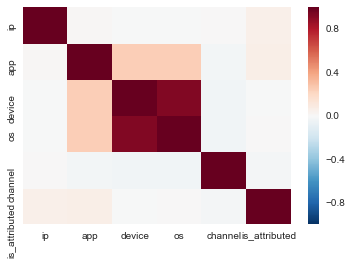

In [25]:
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)